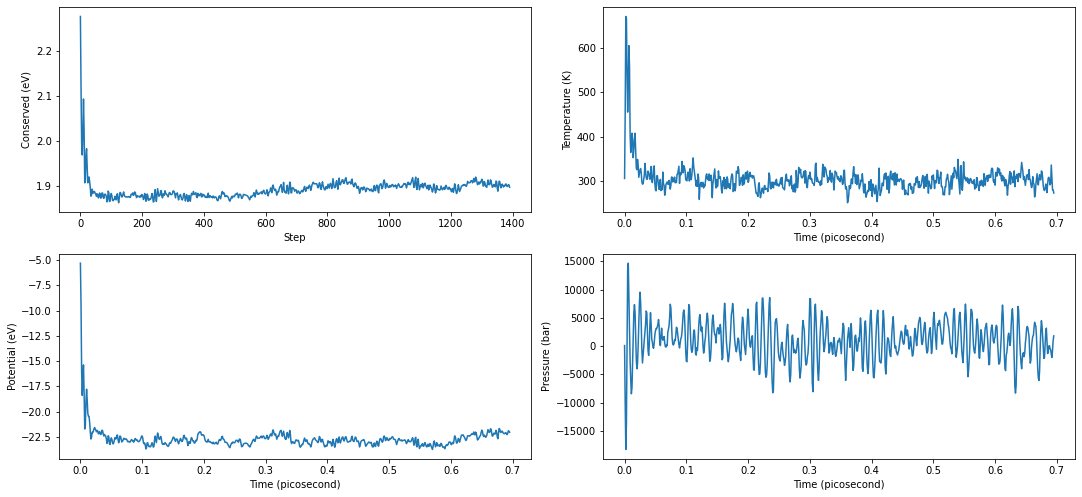

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the columns names
columns = [
    "step",
    "time{picosecond}",
    "conserved{electronvolt}",
    "temperature{kelvin}",
    "kinetic_md{electronvolt}",
    "potential{electronvolt}",
    "pressure_md{bar}",
    "volume{angstrom3}",
    "ensemble_temperature{kelvin}",
    "cell_a", "cell_b", "cell_c", "cell_A", "cell_B", "cell_C"
]

# Read the file, skip the header, and use whitespace as a separator
data_file = 'BPNN-H2O-md.out' # Change this to the path of your file
data = pd.read_csv(data_file, skiprows=10, header=None, sep='\s+', names=columns)

# Plot the data
plt.figure(figsize=[15,10])

plt.subplot(3, 2, 1)
plt.plot(data['step'], data["conserved{electronvolt}"])
plt.xlabel('Step')
plt.ylabel('Conserved (eV)')

plt.subplot(3, 2, 2)
plt.plot(data['time{picosecond}'], data['temperature{kelvin}'])
plt.xlabel('Time (picosecond)')
plt.ylabel('Temperature (K)')

plt.subplot(3, 2, 3)
plt.plot(data['time{picosecond}'], data['potential{electronvolt}'])
plt.xlabel('Time (picosecond)')
plt.ylabel('Potential (eV)')

plt.subplot(3, 2, 4)
plt.plot(data['time{picosecond}'], data['pressure_md{bar}'])
plt.xlabel('Time (picosecond)')
plt.ylabel('Pressure (bar)')

"""
plt.subplot(3, 2, 5)
plt.plot(data['time{picosecond}'], data['volume{angstrom3}'])
plt.xlabel('Time (picosecond)')
plt.ylabel('Volume (angstrom^3)')
"""
plt.tight_layout()
plt.show()

In [2]:
import ase.geometry.analysis
from ase.visualize import view

In [3]:
! pwd

/Users/matthiaskellner/Documents/PhD/H2O/simulations/test


In [4]:
frames = ase.io.read("BPNN-H2O-md.xc.xyz", index=":")
start_frame = ase.io.read("../../data/water_converted.xyz", index="-1")

for frame in frames:
    frame.set_cell(start_frame.get_cell())
    frame.set_pbc(start_frame.get_pbc())
    frame.wrap(eps=1e-12)

In [5]:
view(frames)

<Popen: returncode: None args: ['/opt/anaconda3/envs/science/bin/python', '-...>

Traceback (most recent call last):
  File "/opt/anaconda3/envs/science/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/anaconda3/envs/science/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/envs/science/lib/python3.10/site-packages/ase/gui/pipe.py", line 32, in <module>
    main()
  File "/opt/anaconda3/envs/science/lib/python3.10/site-packages/ase/gui/pipe.py", line 28, in main
    plt.show()
  File "/opt/anaconda3/envs/science/lib/python3.10/site-packages/matplotlib/pyplot.py", line 446, in show
    return _get_backend_mod().show(*args, **kwargs)
  File "/opt/anaconda3/envs/science/lib/python3.10/site-packages/matplotlib_inline/backend_inline.py", line 41, in show
    display(
  File "/opt/anaconda3/envs/science/lib/python3.10/site-packages/IPython/core/display_functions.py", line 265, in display
    print(*objs)
ValueError: I/O operation on closed file.


In [114]:




analysis_obj = ase.geometry.analysis.Analysis(frames)


In [131]:
start_frame.get_cell()

Cell([[12.942278, 0.0, 0.0], [-1e-06, 12.942278, 0.0], [-1e-06, -1e-06, 12.942278]])

In [132]:
start_frame.get_positions()

array([[ 1.31875194e+01, -1.30046358e+00, -1.93893705e+01],
       [ 1.21917667e+01, -1.64734982e+00, -1.97001034e+01],
       [ 1.33396579e+01, -1.23209388e+00, -1.84279614e+01],
       [ 2.72598232e+01,  2.61951186e+01,  6.53380390e-01],
       [ 2.79704553e+01,  2.64493354e+01,  3.46123700e-01],
       [ 2.71190620e+01,  2.52968403e+01,  8.81021850e-01],
       [ 7.22385102e+00, -1.24725480e-01,  8.81434605e+00],
       [ 7.35408154e+00,  7.20252520e-01,  9.29298684e+00],
       [ 7.93749941e+00, -7.72836860e-01,  8.99828805e+00],
       [-1.65223942e+00, -4.51222528e+00, -1.34866633e+00],
       [-9.48534280e-01, -5.03360771e+00, -1.32443531e+00],
       [-1.43481109e+00, -3.51718162e+00, -1.41600413e+00],
       [ 3.19712996e+00,  1.83132887e+01,  1.03898654e+01],
       [ 3.15211285e+00,  1.74958157e+01,  1.00466939e+01],
       [ 3.15483282e+00,  1.77526783e+01,  1.13942966e+01],
       [-4.39941529e+00,  6.09151763e+00,  3.25106899e+00],
       [-4.75863136e+00,  7.11939144e+00

In [133]:
out = analysis_obj.get_rdf(10., 100, elements=[1,1], return_dists=True)

bins = out[0][1]
vals = [x[0] for x in out]
mean_vals = np.mean(vals, axis=0)

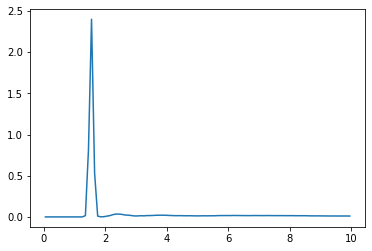

In [134]:
plt.plot(bins, mean_vals)

In [120]:
plt.plot(np.linspace(-np.mean(out,axis=0)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.73576210e-02, 8.65049008e+00, 1.04846276e+00, 8.62515171e-04,
       1.82525865e-04, 0.00000000e+00, 1.35665025e-04, 8.31112919e-04,
       4.19116919e-03, 1.29478168e-02, 1.62540438e-02, 1.53803237e-02,
       9.97928684e-03, 6.72740068e-03, 5.07203210e-03, 3.25473249e-03,
       2.32905436e-03, 1.75509238e-03, 1.74703328e-03, 2.67868170e-03,
       5.51494748e-03, 6.98344938e-03, 1.11644878e-02, 1.50677953e-02,
       1.63699609e-02, 1.62971691e-02, 1.44312483e-02, 1.27920170e-02,
       1.15652991e-02, 9.04945847e-03, 7.81548911e-03, 8.01000390e-03,
       8.05424589e-03, 7.04121696e-03, 6.79276457e-03, 6.84595778e-03,
       5.74924215e-03, 6.69841419e-03, 6.57177525e-03, 7.18325162e-03,
       6.85370785e-03, 6.66111396e-03, 7.76494755e-03, 7.54164209e-03,
       7.95070218e-03, 7.74598789e-03, 8.41540304e-03, 8.09635832e-03,
      